In [60]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

In [3]:
df=pd.read_csv('processed_transcription.csv')

In [5]:
pd.set_option('display.max_colwidth', 255)
df.head()

,Unnamed: 0,medical_specialty,transcription
0,3,Cardiovascular / Pulmonary,mmode left atrial enlargement left atrial diameter cm normal size right left ventricle normal lv systolic function left ventricular ejection fraction normal lv diastolic function pericardial effusion normal morphology aortic valve mitral valve tricusp...
1,4,Cardiovascular / Pulmonary,left ventricular cavity size wall thickness appear normal wall motion left ventricular systolic function appears hyperdynamic estimated ejection fraction nearcavity obliteration seen also appears increased left ventricular outflow tract gradient mid c...
2,7,Cardiovascular / Pulmonary,echocardiogrammultiple view heart great vessel reveal normal intracardiac great vessel relationship cardiac function normal significant chamber enlargement hypertrophy pericardial effusion vegetation seen doppler interrogation including color flow ima...
3,9,Cardiovascular / Pulmonary,description normal cardiac chamber size normal left ventricular size normal lv systolic function ejection fraction estimated around aortic valve seen good motion mitral valve seen good motion tricuspid valve seen good motion pericardial effusion intra...
4,11,Cardiovascular / Pulmonary,study mild aortic stenosis widely calcified minimally restricted mild left ventricular hypertrophy normal systolic function moderate biatrial enlargement normal right ventricle normal appearance tricuspid mitral valve normal left ventricle left ventri...


In [23]:
def print_categories(diff_categories):
    i=1
    for name,data in diff_categories:
        print('Category:'+str(i)+' '+name+' : '+str(len(data)))
        i=i+1

In [24]:
diff_categories=df.groupby(df['medical_specialty'])
print_categories(diff_categories)

Category:1 Cardiovascular / Pulmonary : 371
Category:2 Consult - History and Phy. : 516
Category:3 Discharge Summary : 108
Category:4 ENT - Otolaryngology : 96
Category:5 Emergency Room Reports : 75
Category:6 Gastroenterology : 224
Category:7 General Medicine : 259
Category:8 Hematology - Oncology : 90
Category:9 Nephrology : 81
Category:10 Neurology : 223
Category:11 Neurosurgery : 94
Category:12 Obstetrics / Gynecology : 155
Category:13 Ophthalmology : 83
Category:14 Orthopedic : 355
Category:15 Pediatrics - Neonatal : 70
Category:16 Radiology : 273
Category:17 SOAP / Chart / Progress Notes : 166
Category:18 Surgery : 1088
Category:19 Urology : 156


In [39]:
def con_met_display(con_met,label):
    fig = plt.figure(figsize=(19,19))
    ax= fig.add_subplot(1,1,1)
    sns.heatmap(con_met, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(label); ax.yaxis.set_ticklabels(label);
    plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
    plt.show()

In [7]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75,min_df=5, use_idf=True, smooth_idf=True,sublinear_tf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(df['transcription'].tolist() )

In [18]:
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = df['medical_specialty'].tolist()
category_list = df.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)   
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(3362, 654)
Test_Set_Size:(1121, 654)


Testing of different models

1.Logisctic regression

In [19]:
log_reg=LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= log_reg.predict(X_test)

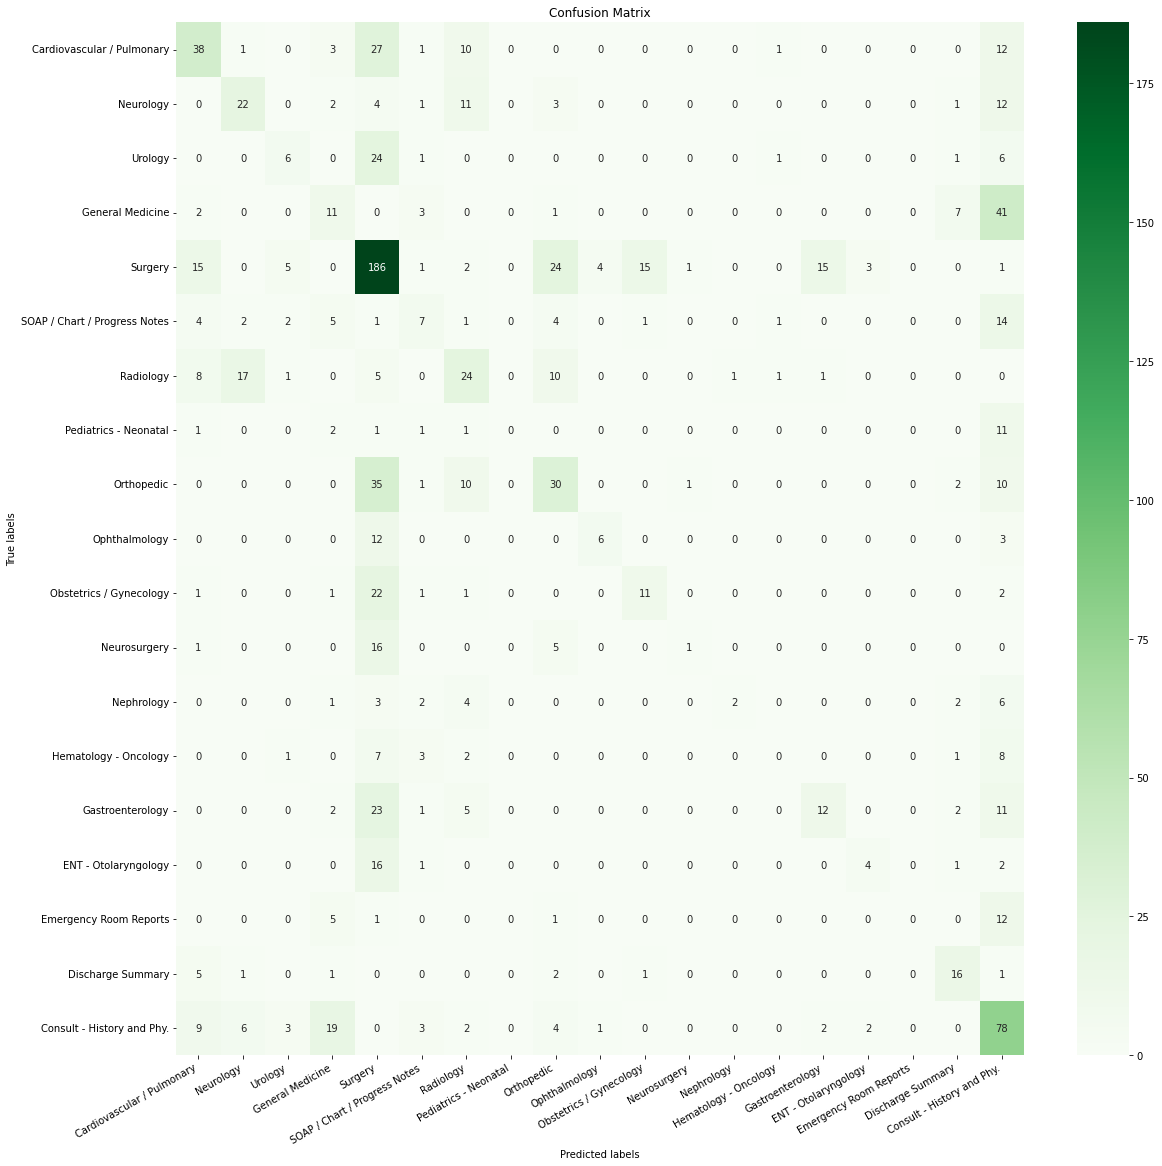

In [40]:
label=category_list
con_met=confusion_matrix(y_test, y_test_pred,labels=label)
con_met_display(con_met,label)

In [35]:
print(classification_report(y_test,y_test_pred,labels=category_list))

                               precision    recall  f1-score   support

   Cardiovascular / Pulmonary       0.45      0.41      0.43        93
                    Neurology       0.45      0.39      0.42        56
                      Urology       0.33      0.15      0.21        39
             General Medicine       0.21      0.17      0.19        65
                      Surgery       0.49      0.68      0.57       272
SOAP / Chart / Progress Notes       0.26      0.17      0.20        42
                    Radiology       0.33      0.35      0.34        68
        Pediatrics - Neonatal       0.00      0.00      0.00        17
                   Orthopedic       0.36      0.34      0.35        89
                Ophthalmology       0.55      0.29      0.37        21
      Obstetrics / Gynecology       0.39      0.28      0.33        39
                 Neurosurgery       0.33      0.04      0.08        23
                   Nephrology       0.67      0.10      0.17        20
     

c:\Users\ADITYA SANDILYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADITYA SANDILYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADITYA SANDILYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [82]:
svc=SVC(random_state=42,kernel='rbf',degree=19).fit(X_train, y_train)
y_test_pred= svc.predict(X_test)

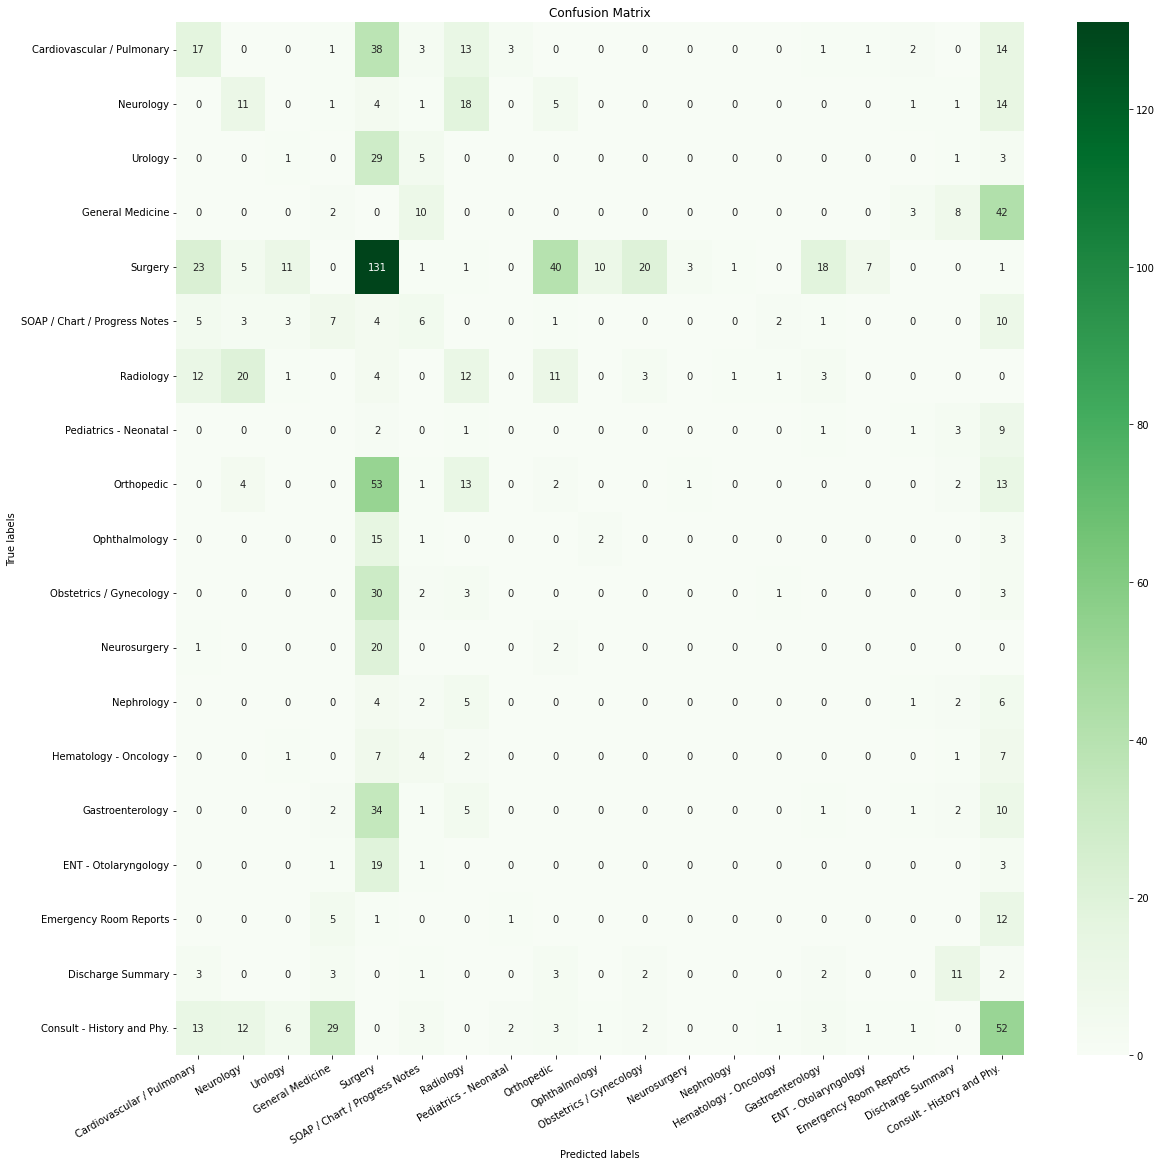

In [83]:
label=category_list
con_met=confusion_matrix(y_test, y_test_pred,labels=label)
con_met_display(con_met,label)

In [84]:
print(classification_report(y_test,y_test_pred,labels=category_list))

                               precision    recall  f1-score   support

   Cardiovascular / Pulmonary       0.23      0.18      0.20        93
                    Neurology       0.20      0.20      0.20        56
                      Urology       0.04      0.03      0.03        39
             General Medicine       0.04      0.03      0.03        65
                      Surgery       0.33      0.48      0.39       272
SOAP / Chart / Progress Notes       0.14      0.14      0.14        42
                    Radiology       0.16      0.18      0.17        68
        Pediatrics - Neonatal       0.00      0.00      0.00        17
                   Orthopedic       0.03      0.02      0.03        89
                Ophthalmology       0.15      0.10      0.12        21
      Obstetrics / Gynecology       0.00      0.00      0.00        39
                 Neurosurgery       0.00      0.00      0.00        23
                   Nephrology       0.00      0.00      0.00        20
     